# Analysis for NFL Teams Current Success Based on Essential Positions Historical Statistics

Josh McCoy and Zach Goodman

[Link to website](https://joshmccoy2.github.io)

# Project Goals

The goal of our project is to analyze significant positions of NFL teams and see which statistics for those positions correlate to success. We will determine which positions in the NFL are important by utilizing market cap data for each NFL team between 2014-2020. After we have idenitifed the most significant positions for NFL teams, we will create a predictive model that examines the statistics for that given position and will predict the total wins an NFL franchise should have in that given season.



# About The Dataset

We obtained this data from the "NFL Scores and Betting Data" dataset found on Kaggle.com. It contains NFL game results since 1966, and information about the betting odds of each game since 1979, along with information about the weather from each game. The betting odds include the favored team, the over/under of each game and where the game was played. It also contains information about each stadium and team that has ever existed in the NFL.

In [2]:
import pandas as pd
import numpy as np

stadiums_df = pd.read_csv("stadiums.csv", encoding="ISO-8859-1") #import Stadium info
teams_df = pd.read_csv("nfl_teams.csv", encoding="ISO-8859-1")  #import Team info
scores_df = pd.read_csv("spreadspoke_scores.csv", encoding="ISO-8859-1") #import each game score/spread info



Table 1:

This first table comes from "stadiums.csv", found in the "NFL Scores and Betting Data" dataset. It contains information about all of the stadiums that NFL games have been played in and ample information about each of them. For example, it has the stadium location, both in terms of city and coordinates, the opening and/or closing year of the arena, stadium type, weather type, capacity, and more. This dataframe can be useful in many different ways. Some questions we can answer by examining this dataframe is, which is the best stadium to play a football game in hot weather, or snowy weather? Does stadium capacity affect the outcome of games? Does the elevation, like in Denver, negatively affect the visiting team that isn't used to those conditions? 

In [3]:
stadiums_df

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,"65,500",Grass,USW00094823,"PITTSBURGH ASOS, PA US",40.4846,-80.2144,366.7
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,dome,72000,FieldTurf,NaN,NaN,NaN,NaN,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,NaN,NaN,dome,65000,Grass,NaN,NaN,NaN,NaN,NaN
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,NaN,NaN,moderate,"75,024",Grass,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,War Memorial Stadium,"Buffalo, NY",1960.0,1972.0,outdoor,"285 Dodge Street, Buffalo, NY 14208",14208,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,Wembley Stadium,"London, UK",2007.0,NaN,outdoor,"Wembley, London HA9 0WS, United Kingdom","Heathrow, UK",moderate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,Wrigley Field,"Chicago, IL",1920.0,1970.0,outdoor,"1060 West Addison Street, Chicago, IL 60613",60613,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,Yale Bowl,"New Haven, CT",NaN,NaN,outdoor,"276 Derby Ave, West Haven, CT 06516",6516,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN


Lets check the dtypes.

In [4]:
stadiums_df.dtypes

stadium_name                     object
stadium_location                 object
stadium_open                    float64
stadium_close                   float64
stadium_type                     object
stadium_address                  object
stadium_weather_station_code     object
stadium_weather_type             object
stadium_capacity                 object
stadium_surface                  object
STATION                          object
NAME                             object
LATITUDE                        float64
LONGITUDE                       float64
ELEVATION                       float64
dtype: object

checking the dtypes we see that they are properly formatted.

Table 2:

This table comes from "nfl_teams.csv", also found in the "NFL Scores and Betting Data" dataset. It contains information about every team that is currently in the league, or has ever been in the NFL. As you can see, it contains the full and short team names, team IDs, and the teams' conference and division, both before and after 2002.

In [5]:
teams_df.head()

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
2,Baltimore Colts,Colts,IND,CLT,AFC,NaN,AFC,AFC East
3,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
4,Boston Patriots,Patriots,NE,NWE,AFC,NaN,AFC,NaN


For our purposes, we only care about modern football because the game has changed significantly throughout the years. Therefore, we will limit the data to 2014-present day.

In [6]:
scores_df = pd.read_csv("spreadspoke_scores.csv", encoding="ISO-8859-1") #import each game score/spread info

scores_df = scores_df[scores_df["schedule_season"]>=2014]  #limiting the dataFrame to dates 2014 and later
scores_df = scores_df[scores_df["schedule_playoff"]==False]
scores_df.head(3)


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
11076,9/4/2014,2014,1,False,Seattle Seahawks,36.0,16.0,Green Bay Packers,SEA,-4.5,46.5,CenturyLink Field,False,70.0,5.0,NaN,NaN
11077,9/7/2014,2014,1,False,Atlanta Falcons,37.0,34.0,New Orleans Saints,NO,-3.0,52,Georgia Dome,False,72.0,0.0,NaN,DOME
11078,9/7/2014,2014,1,False,Baltimore Ravens,16.0,23.0,Cincinnati Bengals,BAL,-1.0,42.5,M&T Bank Stadium,False,78.0,0.0,NaN,NaN


Now, we are separating regular season games from playoff games. Our intended use of this data is to predict regular season wins.

In [7]:
df_scores = pd.read_csv("spreadspoke_scores.csv", encoding="ISO-8859-1") #import each game score/spread info

playoffs = df_scores[df_scores["schedule_season"]>=2014]  #limiting the dataFrame to dates 2014 and later
playoffs = playoffs[playoffs["schedule_playoff"]==True]

playoffs.head(3)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
11332,1/3/2015,2014,Wildcard,True,Carolina Panthers,27.0,16.0,Arizona Cardinals,CAR,-5.5,37.5,Bank of America Stadium,False,51.0,6.0,NaN,NaN
11333,1/3/2015,2014,Wildcard,True,Pittsburgh Steelers,17.0,30.0,Baltimore Ravens,PIT,-3.0,45,Heinz Field,False,48.0,10.0,NaN,NaN
11334,1/4/2015,2014,Wildcard,True,Dallas Cowboys,24.0,20.0,Detroit Lions,DAL,-6.0,48.5,Cowboys Stadium,False,72.0,0.0,NaN,DOME


Now, we created a column to add in away and home wins, as well as away and home losses.

In [8]:
scores_df['away_win'] = np.where(scores_df['score_home'] < scores_df['score_away'], 1, 0)
scores_df['away_loss'] = np.where(scores_df['score_home'] > scores_df['score_away'], 1, 0)
scores_df['home_win'] = np.where(scores_df['score_home'] > scores_df['score_away'], 1, 0)
scores_df['home_loss'] = np.where(scores_df['score_home'] < scores_df['score_away'], 1, 0)
scores_df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,away_win,away_loss,home_win,home_loss
11076,9/4/2014,2014,1,False,Seattle Seahawks,36.0,16.0,Green Bay Packers,SEA,-4.5,...,CenturyLink Field,False,70.0,5.0,NaN,NaN,0,1,1,0
11077,9/7/2014,2014,1,False,Atlanta Falcons,37.0,34.0,New Orleans Saints,NO,-3.0,...,Georgia Dome,False,72.0,0.0,NaN,DOME,0,1,1,0
11078,9/7/2014,2014,1,False,Baltimore Ravens,16.0,23.0,Cincinnati Bengals,BAL,-1.0,...,M&T Bank Stadium,False,78.0,0.0,NaN,NaN,1,0,0,1
11079,9/7/2014,2014,1,False,Chicago Bears,20.0,23.0,Buffalo Bills,CHI,-7.0,...,Soldier Field,False,77.0,7.0,NaN,NaN,1,0,0,1
11080,9/7/2014,2014,1,False,Dallas Cowboys,17.0,28.0,San Francisco 49ers,SF,-3.5,...,Cowboys Stadium,False,72.0,0.0,NaN,DOME,1,0,0,1


Now, we want to sum all these wins and losses to create a table to see the total success of these teams.

In [9]:
record = pd.DataFrame()
record["home_win"] = scores_df.groupby("team_home")[["home_win"]].sum() 
record["home_loss"] = scores_df.groupby("team_home")[["home_loss"]].sum() 
record["away_win"] = scores_df.groupby("team_away")[["away_win"]].sum()
record["away_loss"] = scores_df.groupby("team_away")[["away_loss"]].sum()
record["total_win"] = record["home_win"] + record["away_win"] 
record["total_loss"] = record["home_loss"] + record["away_loss"]
record = record.reset_index()
record = record.rename(columns={'team_home': 'team_name'})
record.head()

,team_name,home_win,home_loss,away_win,away_loss,total_win,total_loss
0,Arizona Cardinals,32,33,36,31,68,64
1,Atlanta Falcons,29,37,33,35,62,72
2,Baltimore Ravens,44,24,34,32,78,56
3,Buffalo Bills,43,24,34,33,77,57
4,Carolina Panthers,34,34,28,37,62,71


Finally, we will add this table (record) to our original team table (team_name).

In [10]:
teams_df = teams_df.merge(record, on=["team_name"], how='inner', suffixes=(False, False))
teams_df = teams_df.set_index("team_name")

In [11]:
teams_df.head()

,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002,home_win,home_loss,away_win,away_loss,total_win,total_loss
team_name,,,,,,,,,,,,,
Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West,32,33,36,31,68,64
Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West,29,37,33,35,62,72
Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central,44,24,34,32,78,56
Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East,43,24,34,33,77,57
Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West,34,34,28,37,62,71


Now, we will check the dtype. 

In [12]:
teams_df.dtypes

team_name_short            object
team_id                    object
team_id_pfr                object
team_conference            object
team_division              object
team_conference_pre2002    object
team_division_pre2002      object
home_win                    int64
home_loss                   int64
away_win                    int64
away_loss                   int64
total_win                   int64
total_loss                  int64
dtype: object

The dtypes for each are correct.

Now, we want to display the total wins since 2014 by each NFL franchise. This quickly identifies what franchises are better than others since 2014.

In [13]:
import matplotlib.pyplot as plt

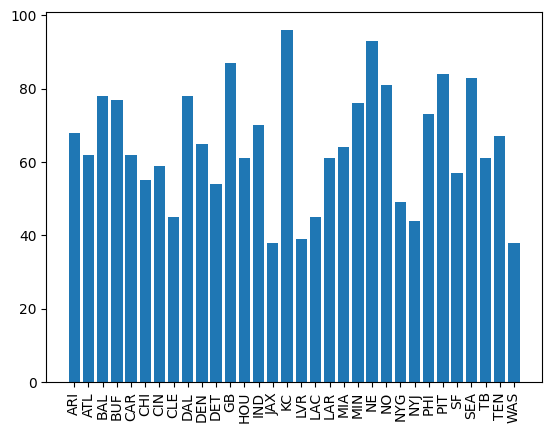

In [14]:
#teams1 = teams_df.groupby("team_id").total_win
#teams1.plot.bar()
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

teams = teams_df.team_id
wins = teams_df.total_win

ax.bar(teams, wins)

plt.xticks(rotation=90)
plt.autoscale(enable=True, axis='both', tight=None)


# Cap (Below This Header) __________________________________________________

This dataset was found on .... and identifies the cap space information for each team like player name, position, cap hit, cap percentage, season, and team. Market Cap limits NFL franchises in the amount of money they spend on their respective players. This is important because we want to analyze if there is a difference in the positions taking up the most cap percentage for unsuccessful teams versus successful teams.

In [15]:
salary_cap = pd.read_csv("2014-thru-2020-cap-tables-1.csv", encoding="ISO-8859-1")#import salary cap info

salary_cap = salary_cap.sort_values(by=["team", "season", "pos"], ascending=True)
salary_cap = salary_cap.rename(columns={"name":"Player"})
salary_cap.head(3)

,Player,pos,cap_hit,cap_percent,season,team
48,Lyle Sendlein,C,4125000,3.04,2014,Arizona Cardinals
35,Patrick Peterson,CB,6937132,5.11,2014,Arizona Cardinals
43,Jerraud Powers,CB,4750000,3.50,2014,Arizona Cardinals


In [16]:

cap14 = pd.DataFrame()
cap15 = pd.DataFrame()
cap16 = pd.DataFrame()
cap17 = pd.DataFrame()
cap18 = pd.DataFrame()
cap19 = pd.DataFrame()
cap20 = pd.DataFrame()

cap20 = salary_cap
cap14 = cap20
cap15 = cap20
cap16 = cap20
cap17 = cap20
cap18 = cap20
cap19 = cap20


# cap20 = cap20.drop(columns=["name", "cap_hit"])
cap14 = cap14[cap14["season"]==2014]
cap15 = cap15[cap15["season"]==2015]
cap16 = cap16[cap16["season"]==2016]
cap17 = cap17[cap17["season"]==2017]
cap18 = cap18[cap18["season"]==2018]
cap19 = cap19[cap19["season"]==2019]
cap20 = cap20[cap20["season"]==2020]

First, for every NFL franchise, lets see how every position takes a bite out the pie:). In other words, on an NFL level, what positions are valued higher than others.

<AxesSubplot: ylabel='cap_percent'>

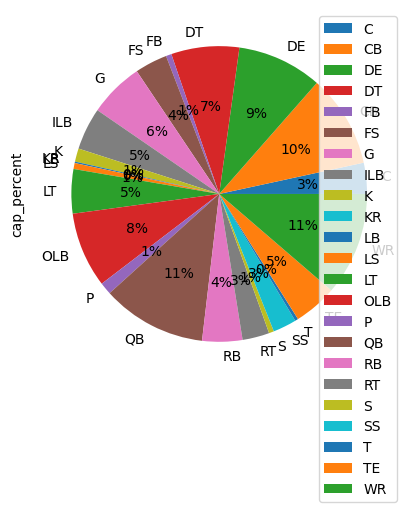

In [17]:
pie_cap = salary_cap.drop(columns = ["Player", "cap_hit"])
pie_cap = salary_cap.groupby("pos")[["cap_percent"]].sum()
pie_cap.plot(
    kind='pie', y='cap_percent', autopct='%1.0f%%')

Throughout the years 2014-2020, there is a large portion of the teams cap_percentage going towards DE,QB,OLB,WR,CB. We will further investigate this to see if winning franchises pay different positions more frequently than losing franchises.

In [18]:
seasonRecord = pd.DataFrame()
seasonRecord["Season"] = scores_df["schedule_season"]
seasonRecord["Home Team"] = scores_df["team_home"]
seasonRecord["Away Team"] = scores_df["team_away"]
seasonRecord["home_win"] = scores_df["home_win"]
seasonRecord["away_win"] = scores_df["away_win"]
seasonRecord["away_loss"] = scores_df["away_loss"]
seasonRecord["home_loss"] = scores_df["home_loss"]
seasonRecord = seasonRecord[seasonRecord["Season"]>=2014]

In [19]:
hometeam_wins = seasonRecord.groupby(["Home Team","Season"])[["home_win"]].sum() 
hometeam_loss = seasonRecord.groupby(["Home Team","Season"])[["home_loss"]].sum() 
awayteam_loss = seasonRecord.groupby(["Away Team","Season"])[["away_loss"]].sum() 
awayteam_win = seasonRecord.groupby(["Away Team","Season"])[["away_win"]].sum()

In [20]:
hometeam_loss = seasonRecord.groupby(["Home Team","Season"])[["home_loss"]].sum() 
awayteam_loss
homeTeamLossPivot = pd.pivot_table(hometeam_loss, values="home_loss", index="Home Team", columns="Season")
homeLoss = homeTeamLossPivot.reset_index()
homeLoss["Team"] = homeLoss["Home Team"]
del homeLoss["Home Team"]
column_to_move = homeLoss.pop("Team")
homeLoss.insert(0, "Team", column_to_move)
homeLoss = homeLoss.set_index(["Team"])

In [21]:
awayteam_loss = seasonRecord.groupby(["Away Team","Season"])[["away_loss"]].sum() 
awayteam_loss
awayTeamLossPivot = pd.pivot_table(awayteam_loss, values="away_loss", index="Away Team", columns="Season")
awayLoss = awayTeamLossPivot.reset_index()
awayLoss["Team"] = awayLoss["Away Team"]
del awayLoss["Away Team"]
column_to_move = awayLoss.pop("Team")
awayLoss.insert(0, "Team", column_to_move)
awayLoss = awayLoss.set_index(["Team"])

In [22]:
awayteam_wins = seasonRecord.groupby(["Away Team","Season"])[["away_win"]].sum() 
awayteam_wins
awayTeamWinsPivot = pd.pivot_table(awayteam_wins, values="away_win", index="Away Team", columns="Season")
awayWin = awayTeamWinsPivot.reset_index()
awayWin["Team"] = awayWin["Away Team"]
del awayWin["Away Team"]
column_to_move = awayWin.pop("Team")
awayWin.insert(0, "Team", column_to_move)
awayWin = awayWin.set_index(["Team"])

In [23]:
homeTeamWinsPivot = pd.pivot_table(hometeam_wins, values="home_win", index="Home Team", columns="Season")
homeWin = homeTeamWinsPivot.reset_index()
homeWin["Team"] = homeWin["Home Team"]
del homeWin["Home Team"]
column_to_move = homeWin.pop("Team")
homeWin.insert(0, "Team", column_to_move)
homeWin = homeWin.set_index(["Team"])

In [24]:
seasonWins = pd.DataFrame()
seasonWins["2014 W"] = homeWin[2014] + awayWin[2014]
seasonWins["2015 W"] = homeWin[2015] + awayWin[2015]
seasonWins["2016 W"] = homeWin[2016] + awayWin[2016]
seasonWins["2017 W"] = homeWin[2017] + awayWin[2017]
seasonWins["2018 W"] = homeWin[2018] + awayWin[2018]
seasonWins["2019 W"] = homeWin[2019] + awayWin[2019]
seasonWins["2020 W"] = homeWin[2020] + awayWin[2020]
seasonWins["2021 W"] = homeWin[2021] + awayWin[2021]
seasonWins["2022 W"] = homeWin[2022] + awayWin[2022]

seasonLoss = pd.DataFrame()
seasonLoss["2014 L"] = homeLoss[2014] + awayLoss[2014]
seasonLoss["2015 L"] = homeLoss[2015] + awayLoss[2015]
seasonLoss["2016 L"] = homeLoss[2016] + awayLoss[2016]
seasonLoss["2017 L"] = homeLoss[2017] + awayLoss[2017]
seasonLoss["2018 L"] = homeLoss[2018] + awayLoss[2018]
seasonLoss["2019 L"] = homeLoss[2019] + awayLoss[2019]
seasonLoss["2020 L"] = homeLoss[2020] + awayLoss[2020]
seasonLoss["2021 L"] = homeLoss[2021] + awayLoss[2021]
seasonLoss["2022 L"] = homeLoss[2022] + awayLoss[2022]

year_rec = pd.DataFrame()
year_rec = seasonWins.merge(seasonLoss, on=["Team"])

In [25]:
column_to_move = year_rec.pop("2014 L")
year_rec.insert(1, "2014 L", column_to_move)
column_to_move = year_rec.pop("2015 L")
year_rec.insert(3, "2015 L", column_to_move)
column_to_move = year_rec.pop("2016 L")
year_rec.insert(5, "2016 L", column_to_move)
column_to_move = year_rec.pop("2017 L")
year_rec.insert(7, "2017 L", column_to_move)
column_to_move = year_rec.pop("2018 L")
year_rec.insert(9, "2018 L", column_to_move)
column_to_move = year_rec.pop("2019 L")
year_rec.insert(11, "2019 L", column_to_move)
column_to_move = year_rec.pop("2020 L")
year_rec.insert(13, "2020 L", column_to_move)
column_to_move = year_rec.pop("2021 L")
year_rec.insert(15, "2021 L", column_to_move)
column_to_move = year_rec.pop("2022 L")
year_rec.insert(17, "2022 L", column_to_move)
year_rec

,2014 W,2014 L,2015 W,2015 L,2016 W,2016 L,2017 W,2017 L,2018 W,2018 L,2019 W,2019 L,2020 W,2020 L,2021 W,2021 L,2022 W,2022 L
Team,,,,,,,,,,,,,,,,,,
Arizona Cardinals,11.0,5.0,13.0,3.0,7.0,8.0,8.0,8.0,3.0,13.0,5.0,10.0,8.0,8.0,11.0,6.0,2.0,3.0
Atlanta Falcons,6.0,10.0,8.0,8.0,11.0,5.0,10.0,6.0,7.0,9.0,7.0,9.0,4.0,12.0,7.0,10.0,2.0,3.0
Baltimore Ravens,10.0,6.0,5.0,11.0,8.0,8.0,9.0,7.0,10.0,6.0,14.0,2.0,11.0,5.0,8.0,9.0,3.0,2.0
Buffalo Bills,9.0,7.0,8.0,8.0,7.0,9.0,9.0,7.0,6.0,10.0,10.0,6.0,13.0,3.0,11.0,6.0,4.0,1.0
Carolina Panthers,7.0,8.0,15.0,1.0,6.0,10.0,11.0,5.0,7.0,9.0,5.0,11.0,5.0,11.0,5.0,12.0,1.0,4.0
Chicago Bears,5.0,11.0,6.0,10.0,3.0,13.0,5.0,11.0,12.0,4.0,8.0,8.0,8.0,8.0,6.0,11.0,2.0,3.0
Cincinnati Bengals,10.0,5.0,12.0,4.0,6.0,9.0,7.0,9.0,6.0,10.0,2.0,14.0,4.0,11.0,10.0,7.0,2.0,3.0
Cleveland Browns,7.0,9.0,3.0,13.0,1.0,15.0,0.0,16.0,7.0,8.0,6.0,10.0,11.0,5.0,8.0,9.0,2.0,3.0
Dallas Cowboys,12.0,4.0,4.0,12.0,13.0,3.0,9.0,7.0,10.0,6.0,8.0,8.0,6.0,10.0,12.0,5.0,4.0,1.0


In [26]:
seasonWins.head(1)

,2014 W,2015 W,2016 W,2017 W,2018 W,2019 W,2020 W,2021 W,2022 W
Team,,,,,,,,,
Arizona Cardinals,11.0,13.0,7.0,8.0,3.0,5.0,8.0,11.0,2.0


<AxesSubplot: xlabel='Team'>

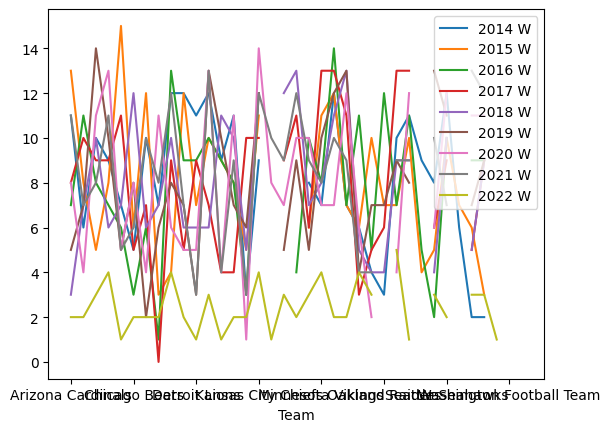

In [27]:
seasonWins.plot.line()

Taking the STD of wins per team for each season from 2014-2020.

In [28]:
seasonWins_to2020 = pd.DataFrame(seasonWins)
seasonWins_to2020 = seasonWins_to2020.drop(columns=["2021 W", "2022 W"])
seasonWins_to2020.std().mean()

3.1742396172056004

In [29]:
seasonWins_to2020.mean()

2014 W    7.96875
2015 W    8.00000
2016 W    7.93750
2017 W    8.00000
2018 W    7.93750
2019 W    7.96875
2020 W    7.96875
dtype: float64

The above shows us that the average amount of wins per season is approximately 8. (It is only not 8 whenever there are one or a few ties that season.) Let's generalize that 8 wins is the average. Therefore, 0-4 wins classify a team as "Bad", 5-11 wins classify a team as "Average"(teams within one standard deviation), and 12-16 wins classify a team as "Good".

In [30]:
big_team_list14 = cap14["team"].values.tolist()
team_list14 = []
[team_list14.append(x) for x in big_team_list14 if x not in team_list14]

big_team_list15 = cap15["team"].values.tolist()
team_list15 = []
[team_list15.append(x) for x in big_team_list15 if x not in team_list15]

big_team_list16 = cap16["team"].values.tolist()
team_list16 = []
[team_list16.append(x) for x in big_team_list16 if x not in team_list16]

big_team_list17 = cap14["team"].values.tolist()
team_list17 = []
[team_list17.append(x) for x in big_team_list17 if x not in team_list17]

big_team_list18 = cap14["team"].values.tolist()
team_list18 = []
[team_list18.append(x) for x in big_team_list18 if x not in team_list18]

big_team_list19 = cap19["team"].values.tolist()
team_list19 = []
[team_list19.append(x) for x in big_team_list19 if x not in team_list19]
team_list19.remove("Green Bay Packers ")

big_team_list20 = cap20["team"].values.tolist()
team_list20 = []
[team_list20.append(x) for x in big_team_list20 if x not in team_list20]
[]

[]

In [31]:
win1920 = pd.DataFrame()
win2014 = pd.DataFrame()
win2015 = pd.DataFrame()
win2016 = pd.DataFrame()
win2017 = pd.DataFrame()
win2018 = pd.DataFrame()
win2019 = pd.DataFrame()
win2020 = pd.DataFrame()

win1920["Win Values"] = [16.0, 15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0]
win1920 = win1920.set_index("Win Values")
pos_list = ["C", "CB", "DE", "DT", "FB", "FS", "G", "ILB", "K", "KR", "LB", "LS", "LT", "OLB", "P", "QB", "RB", "RT", "S", "SS", "T", "TE", "WR"] 
for position in pos_list:
    win1920[position] = 0  

win2014 = win1920.copy(deep=True)
win2015 = win1920.copy(deep=True)
win2016 = win1920.copy(deep=True)
win2017 = win1920.copy(deep=True)
win2018 = win1920.copy(deep=True)
win2019 = win1920.copy(deep=True)
win2020 = win1920.copy(deep=True)

In [32]:
#2014
for team in team_list14:
    winScore = year_rec["2014 W"].loc[team]
    
    df = cap14[cap14["team"]==team].sort_values(by = ["cap_percent"], ascending=False).head(5)
    df = df.reset_index()

    for position in pos_list:
        for i in range(len(df["pos"])):
            if df.loc[i]["pos"] == position:
                win2014.loc[winScore][position] = win2014.loc[winScore][position] + 1

In [33]:
#2015
for team in team_list15:
    winScore = year_rec["2015 W"].loc[team]
    
    df = cap15[cap15["team"]==team].sort_values(by = ["cap_percent"], ascending=False).head(5)
    df = df.reset_index()

    for position in pos_list:
        for i in range(len(df["pos"])):
            if df.loc[i]["pos"] == position:
                win2015.loc[winScore][position] = win2015.loc[winScore][position] + 1

In [34]:
#2016
for team in team_list16:
    winScore = year_rec["2016 W"].loc[team]
    
    df = cap16[cap16["team"]==team].sort_values(by = ["cap_percent"], ascending=False).head(5)
    df = df.reset_index()

    for position in pos_list:
        for i in range(len(df["pos"])):
            if df.loc[i]["pos"] == position:
                win2016.loc[winScore][position] = win2016.loc[winScore][position] + 1

In [35]:
#2017
for team in team_list17:
    winScore = year_rec["2017 W"].loc[team]
    
    df = cap17[cap17["team"]==team].sort_values(by = ["cap_percent"], ascending=False).head(5)
    df = df.reset_index()

    for position in pos_list:
        for i in range(len(df["pos"])):
            if df.loc[i]["pos"] == position:
                win2017.loc[winScore][position] = win2017.loc[winScore][position] + 1

In [36]:
#2018
for team in team_list18:
    winScore = year_rec["2018 W"].loc[team]
    
    df = cap18[cap18["team"]==team].sort_values(by = ["cap_percent"], ascending=False).head(5)
    df = df.reset_index()

    for position in pos_list:
        for i in range(len(df["pos"])):
            if df.loc[i]["pos"] == position:
                win2018.loc[winScore][position] = win2018.loc[winScore][position] + 1

In [37]:
#2019
for team in team_list19:
    winScore = year_rec["2019 W"].loc[team]
    
    df = cap19[cap19["team"]==team].sort_values(by = ["cap_percent"], ascending=False).head(5)
    df = df.reset_index()

    for position in pos_list:
        for i in range(len(df["pos"])):
            if df.loc[i]["pos"] == position:
                win2019.loc[winScore][position] = win2019.loc[winScore][position] + 1

In [38]:
#2020
for team in team_list20:
    winScore = year_rec["2020 W"].loc[team]
    
    df = cap20[cap20["team"]==team].sort_values(by = ["cap_percent"], ascending=False).head(5)
    df = df.reset_index()

    for position in pos_list:
        for i in range(len(df["pos"])):
            if df.loc[i]["pos"] == position:
                win2020.loc[winScore][position] = win2020.loc[winScore][position] + 1

In [39]:
#Making it more readable to be transformed into stacked bar graph
w2014 = pd.DataFrame.transpose(win2014)
w2015 = pd.DataFrame.transpose(win2015)
w2016 = pd.DataFrame.transpose(win2016)
w2017 = pd.DataFrame.transpose(win2017)
w2018 = pd.DataFrame.transpose(win2018)
w2019 = pd.DataFrame.transpose(win2019)
w2020 = pd.DataFrame.transpose(win2020)

In [86]:
#All the stats added up from seasons 2014-2020
w14to20 = pd.DataFrame()
w14to20 = w2014 + w2015 + w2016 + w2017 + w2018 + w2019 + w2020
w14to20.head()

Win Values,16.0,15.0,14.0,13.0,12.0,11.0,10.0,9.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,0.0
Pos,,,,,,,,,,,,,,,,,
C,0,1,0,5,2,6,4,4,3,9,3,2,4,1,1,0,1
CB,0,0,2,6,8,11,15,15,10,13,13,14,9,5,3,2,0
DE,0,1,1,9,5,12,17,10,8,23,16,12,3,8,3,0,1
DT,0,0,1,2,3,8,9,12,6,10,10,5,5,4,2,0,0
FB,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [59]:
good = pd.DataFrame()
good[16.0] = w14to20[16.0]
good[15.0] = w14to20[15.0]
good[14.0] = w14to20[14.0]
good[13.0] = w14to20[13.0]
good[12.0] = w14to20[12.0]
average = pd.DataFrame()
average[11.0] = w14to20[11.0]
average[10.0] = w14to20[10.0]
average[9.0] = w14to20[9.0]
average[8.0] = w14to20[8.0]
average[7.0] = w14to20[7.0]
average[6.0] = w14to20[6.0]
average[5.0] = w14to20[5.0]
bad = pd.DataFrame()
bad[4.0] = w14to20[4.0]
bad[3.0] = w14to20[3.0]
bad[2.0] = w14to20[2.0]
bad[1.0] = w14to20[1.0]
bad[0.0] = w14to20[0.0]

In [42]:
pos_freq = pd.DataFrame(index=w14to20.index, columns=["Good", "Average", "Bad"])
pos_freq["Good"] = 0
pos_freq["Average"] = 0
pos_freq["Bad"] = 0
pos_freq["Good"] = good.sum(axis=1)
pos_freq["Average"] = average.sum(axis=1)
pos_freq["Bad"] = bad.sum(axis=1)
pos_freq.sort_values(by=["Good"], ascending=False)
#top 5 for Good: QB, LT, WR, OLB, CB
pos_freq.sort_values(by=["Average"], ascending=False)
#top 5 for Average: QB, DE, WR, CB, OLB
pos_freq.sort_values(by=["Bad"], ascending=False)

#top 5 for Good: QB, LT, WR, OLB, CB
#top 5 for Average: QB, DE, WR, CB, OLB
#top 5 for Bad: WR, CB, QB, DE, OLB
pos_freq.sum(axis=1).sort_values(ascending=False)

QB     142
WR     136
DE     129
CB     126
OLB    106
LT      90
DT      77
G       57
C       46
ILB     42
TE      42
RB      38
FS      31
RT      21
SS      14
K        1
FB       1
S        1
KR       0
LB       0
P        0
T        0
LS       0
dtype: int64

In [69]:
pos_freq.head(1)

,Good,Average,Bad
C,8,31,7


<AxesSubplot: xlabel='Pos'>

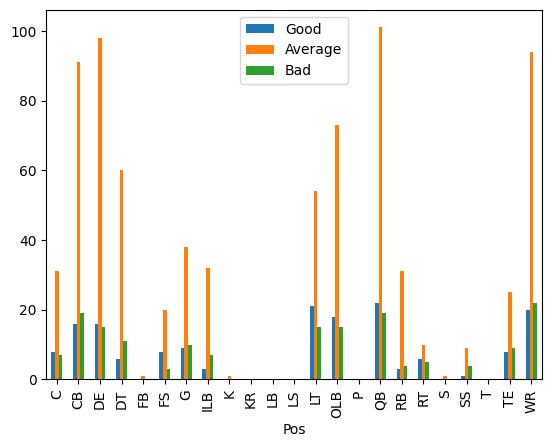

In [88]:
#d = pd.DataFrame()
#d = good
#df_pivot = pd.pivot_table(
 #   df,
 #   values="page_views",
 #   index="year",
 #   columns="month",
 #   aggfunc=np.mean
#)
#alcohol_pct.set_index("Year").groupby("State")["Rates.Alcohol.Use Disorder Past Year.18-25"].plot.line(ylim=(0,0.3), ylabel="Percentage", title="Alcoholism: Ages 18 - 25", figsize=(10,5));
pos_freq.index.name = "Pos"
pos_freq.plot.bar()

In [ ]:
data = load_my_data()
fig, ax = plt.subplots()
pos_freq['Good'].plot(ax=ax, kind='bar')

In [43]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.pro-football-reference.com/years/2020/defense.htm'
#providing a user-agent header
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

b = requests.get(url, headers=headers)
soup = BeautifulSoup(b.content)
def2020 = pd.read_html(str(soup.find("table")))
def2020 = def2020[0]
def2020 = def2020.fillna(value=0)
def2020.columns = def2020.columns.droplevel()
def2020 = def2020.drop(columns=["Yds", "TD", "Lng", "Fmb", "Sfty"])
def2020 = def2020.rename(columns={"Tm":"Team", "G":"Played", "GS":"Started", "PD":"Pass Def", "Sk":"Sack"})
def2020 = def2020.query("Pos in ('DE', 'CB', 'OLB')")
def2020.head()


ModuleNotFoundError: No module named 'requests'

In [ ]:
def2020["Full Team"] = def2020["Team"].map({
    "HOU": "Houston Texans",
    "CHI": "Chicago Bears",
    "TAM": "Tampa Bay Buccaneers",
    "NYJ": "New York Jets",
    "NYG": "New York Giants",
    "BUF": "Buffalo Bills",
    "ARI":"Arizona Cardinals",
    "DAL": "Dallas Cowboys",
    "TEN": "Tennessee Titans",
    "IND": "Indianapolis Colts",
    "JAX": "Jacksonville Jaguars",
    "SEA": "Seattle Seahawks",
    "SFO": "San Francisco 49ers",
    "CIN": "Cincinnati Bengals",
    "ATL": "Atlanta Falcons",
    "DEN": "Denver Broncos",
    "NWE": "New England Patriots",
    "PHI": "Philadelphia Eagles",
    "NOR": "New Orleans Saints",
    "LAR": "Los Angeles Rams",
    "MIN": "Minnesota Vikings",
    "CAR": "Carolina Panthers",
    "KAN": "Kansas City Chiefs",
    "LAC": "Los Angeles Chargers",
    "BAL": "Baltimore Ravens",
    "GNB": "Green Bay Packers",
    "MIA": "Miami Dolphins",
    "DET": "Detroit Lions",
    "WAS": "Washington Football Team",
    "LVR": "Las Vegas Raiders",
    "PIT": "Pittsburgh Steelers",
    "CLE": "Cleveland Browns"
})

In [ ]:
del def2020["Team"]

In [ ]:
column_to_move = def2020.pop("Full Team")
def2020.insert(2, "Full Team", column_to_move)
def2020 = def2020.rename(columns={"Full Team":"Team"})

In [ ]:
test = pd.DataFrame()
test = salary_cap[salary_cap["season"]==2020]
test = test[test["team"]=="New York Giants"]
test.sort_values(by="cap_percent", ascending=False).head()
test = def2020.merge(test, on=["Player"])
test

In [ ]:
w14to20.plot.bar(stacked=True)

In [ ]:
cap = salary_cap.drop(columns = ["Player", "cap_hit"])
cap = pd.pivot_table(cap, index=["season"], columns = ["team", "pos"], values = "cap_percent")
cap

# Closing Thoughts and Final Goals

Our main goal is to predict what teams are able to cover their Vegas betting odds by identifying what factors make most NFL teams succsessful. We first want to identify how often Vegas is right in their predictions and try to analyze what factors Vegas favors the most when setting lines. Once we have a basic understanding of the Vegas lines system, we want to create our own predictive model that can take advantage of Vegas betting lines that we think our favorable. We will do this by adding outside datasets that have the teams individual statistics. If we can identify what makes teams successful and what is a good matchup for a team, we believe our model could have some success. Some questions we want to answer are: "Is a passing, rushing, or balanced offense more effective?" "What makes a favorable matchup for a specific team?" "What players have had the largest impact when switching teams?" and "How often are Vegas favored teams actually making the playoffs?". 